In [1]:
import pandas as pd

plt

active pyforest.LazyImport of <module 'matplotlib.pyplot' from '/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

In [2]:
import os
print(os.getcwd())

/Users/gowtham/analytics vidhya problem


In [3]:
print(os.listdir(os.getcwd()))

['submission_XGB.csv', 'submission_XGB2.csv', 'submission_dtr2.csv', 'submission_XGB3.csv', 'submission_XGB1.csv', 'final analytics vidya problem.ipynb', 'submission_dtr1.csv', 'submission_DT1.csv', 'submission_XGB4.csv', ' Decission tree final analytics vidya problem.ipynb', 'submission_reg.csv', 'submission_XGB5.csv', 'submission_XGB7.csv', 'submission_XGB6.csv', 'Untitled.ipynb', 'TPOT REGRESSION.ipynb', 'submission_DT.csv', 'dt with item visibility.ipynb', 'xgb final analytics vidya problem.ipynb', 'submission_tpot2.csv', 'test  Decission tree final analytics vidya problem.ipynb', '.ipynb_checkpoints', 'submission_XGB8.csv', 'trail 2 analytics vidya problem .ipynb', 'submission_tpot.csv']


In [4]:
# reading the csv file
traindata=pd.read_csv("/Users/gowtham/Downloads/bigmartdata/Train.csv")
testdata=pd.read_csv("/Users/gowtham/Downloads/bigmartdata/Test.csv")

In [5]:
testdata1=testdata[["Item_Identifier","Outlet_Identifier"]]
testdata1

,Item_Identifier,Outlet_Identifier
0,FDW58,OUT049
1,FDW14,OUT017
2,NCN55,OUT010
3,FDQ58,OUT017
4,FDY38,OUT027
5,FDH56,OUT046
6,FDL48,OUT018
7,FDC48,OUT027
8,FDN33,OUT045
9,FDA36,OUT017


In [6]:
traindata.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
testdata.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [8]:
def inspect_data(data):
    return pd.DataFrame({"Data Type":data.dtypes,"No of Levels":data.apply(lambda x: x.nunique(),axis=0), "Levels":data.apply(lambda x: str(x.unique()),axis=0)})
inspect_data(traindata)

,Data Type,No of Levels,Levels
Item_Identifier,object,1559,['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' '...
Item_Weight,float64,415,[9.3 5.92 17.5 19.2 8.93 10.395 13.65 nan 16.2...
Item_Fat_Content,object,5,['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Item_Visibility,float64,7880,[0.016047301 0.019278216 0.016760075 ... 0.035...
Item_Type,object,16,['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vege...
Item_MRP,float64,5938,[249.8092 48.2692 141.618 ... 57.5904 214.5218...
Outlet_Identifier,object,10,['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' ...
Outlet_Establishment_Year,int64,9,[1999 2009 1998 1987 1985 2002 2007 1997 2004]
Outlet_Size,object,3,['Medium' nan 'High' 'Small']
Outlet_Location_Type,object,3,['Tier 1' 'Tier 3' 'Tier 2']


In [9]:
def inspect_data(data):
    return pd.DataFrame({"Data Type":data.dtypes,"No of Levels":data.apply(lambda x: x.nunique(),axis=0), "Levels":data.apply(lambda x: str(x.unique()),axis=0)})
inspect_data(testdata)

,Data Type,No of Levels,Levels
Item_Identifier,object,1543,['FDW58' 'FDW14' 'NCN55' ... 'NCI29' 'FDP28' '...
Item_Weight,float64,410,[20.75 8.3 14.6 7.315 nan 9.8 19.35 6.305 5.98...
Item_Fat_Content,object,5,['Low Fat' 'reg' 'Regular' 'LF' 'low fat']
Item_Visibility,float64,5277,[0.007564836 0.038427677 0.099574908 ... 0.142...
Item_Type,object,16,['Snack Foods' 'Dairy' 'Others' 'Fruits and Ve...
Item_MRP,float64,4402,[107.8622 87.3198 241.7538 ... 141.3154 214.62...
Outlet_Identifier,object,10,['OUT049' 'OUT017' 'OUT010' 'OUT027' 'OUT046' ...
Outlet_Establishment_Year,int64,9,[1999 2007 1998 1985 1997 2009 2002 1987 2004]
Outlet_Size,object,3,['Medium' nan 'Small' 'High']
Outlet_Location_Type,object,3,['Tier 1' 'Tier 2' 'Tier 3']


In [10]:
# see nulvalues in both train and test
pd.DataFrame({"Train data null values":traindata.isnull().sum(),"Test data null values":testdata.isnull().sum()})

,Train data null values,Test data null values
Item_Fat_Content,0,0.0
Item_Identifier,0,0.0
Item_MRP,0,0.0
Item_Outlet_Sales,0,NaN
Item_Type,0,0.0
Item_Visibility,0,0.0
Item_Weight,1463,976.0
Outlet_Establishment_Year,0,0.0
Outlet_Identifier,0,0.0
Outlet_Location_Type,0,0.0


In [11]:
#replacing a group of values with one
traindata.Item_Fat_Content=traindata.Item_Fat_Content.replace(['LF','low fat'],'Low Fat') 
testdata.Item_Fat_Content=testdata.Item_Fat_Content.replace(['LF','low fat'],'Low Fat')

In [12]:
traindata.Item_Fat_Content=traindata.Item_Fat_Content.replace('reg','Regular') 
testdata.Item_Fat_Content=testdata.Item_Fat_Content.replace('reg','Regular') 

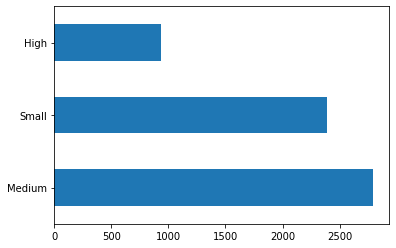

In [13]:
traindata.Outlet_Size.value_counts().plot(kind='barh')

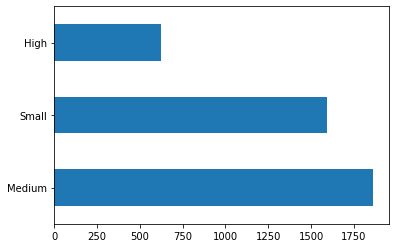

In [14]:
testdata.Outlet_Size.value_counts().plot(kind='barh')

In [15]:
traindata.Outlet_Size=traindata.Outlet_Size.replace(np.NaN,'High') 
testdata.Outlet_Size=testdata.Outlet_Size.replace(np.NaN,'High') 

In [16]:
for df in traindata, testdata:
       print(df.describe(include='all'))

       Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
count             8523  7060.000000             8523      8523.000000   
unique            1559          NaN                2              NaN   
top              FDW13          NaN          Low Fat              NaN   
freq                10          NaN             5517              NaN   
mean               NaN    12.857645              NaN         0.066132   
std                NaN     4.643456              NaN         0.051598   
min                NaN     4.555000              NaN         0.000000   
25%                NaN     8.773750              NaN         0.026989   
50%                NaN    12.600000              NaN         0.053931   
75%                NaN    16.850000              NaN         0.094585   
max                NaN    21.350000              NaN         0.328391   

                    Item_Type     Item_MRP Outlet_Identifier  \
count                    8523  8523.000000              852

In [17]:
traindata.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [18]:
from scipy.stats import chi2_contingency

Text(0.5, 1.0, 'Density and distribution of sales for each outlet sales')

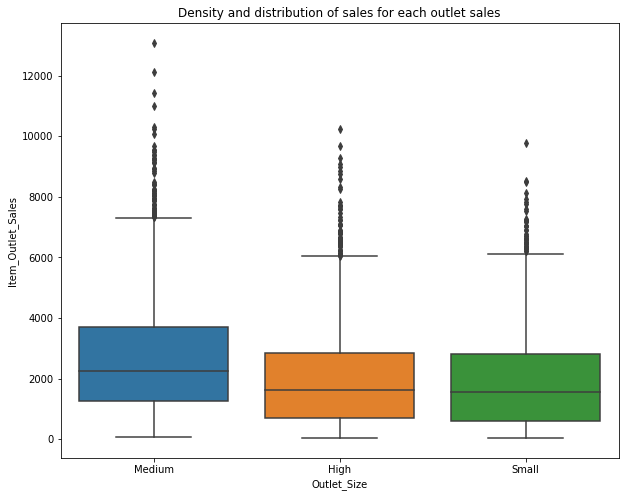

In [19]:
fig,ax=plt.subplots(figsize=(10,8))#size of the plot
plot=sns.boxplot(data=traindata, x='Outlet_Size', y='Item_Outlet_Sales')
plot.set_title('Density and distribution of sales for each outlet sales')

Text(0.5, 1.0, 'Density and distribution of item type for each outlet sales')

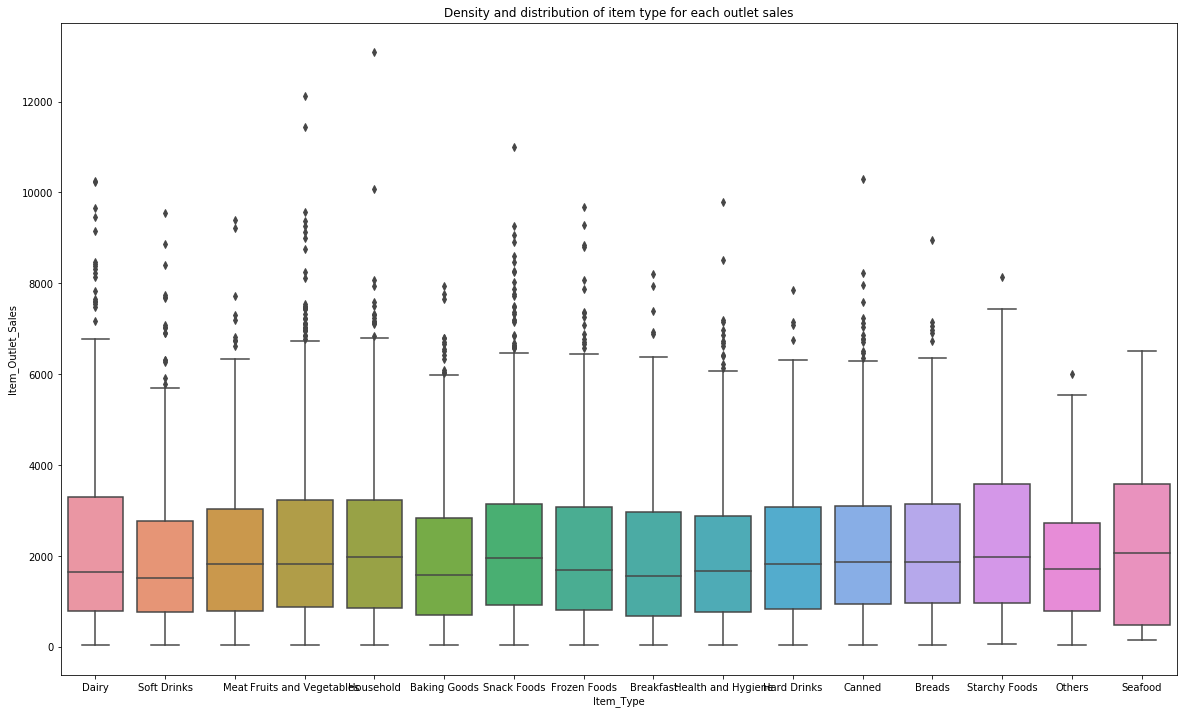

In [20]:
fig,ax=plt.subplots(figsize=(20,12))#size of the plot
plot=sns.boxplot(data=traindata, x='Item_Type', y='Item_Outlet_Sales')
plot.set_title('Density and distribution of item type for each outlet sales')

Text(0.5, 1.0, 'Density and distribution of item type for each outlet sales')

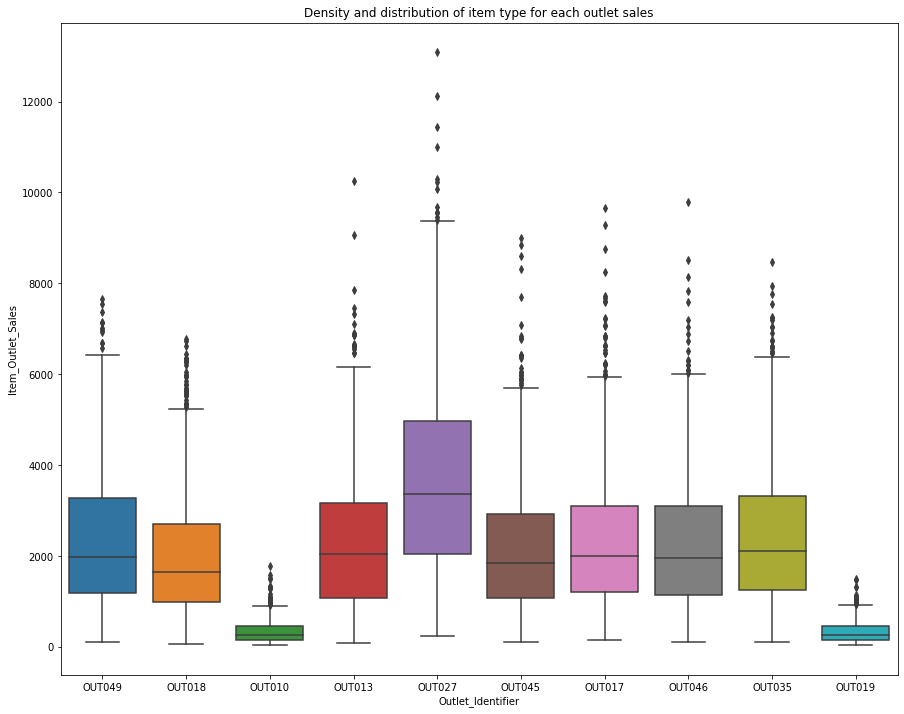

In [21]:
fig,ax=plt.subplots(figsize=(15,12))#size of the plot
plot=sns.boxplot(data=traindata, x='Outlet_Identifier', y='Item_Outlet_Sales')
plot.set_title('Density and distribution of item type for each outlet sales')

In [22]:
outlettype_itemtype_table = pd.crosstab(index=traindata["Item_Type"],columns=traindata["Outlet_Identifier"])
outlettype_itemtype_table

Outlet_Identifier,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
Item_Type,,,,,,,,,,
Baking Goods,42,73,73,68,43,69,68,70,76,66
Breads,17,25,22,27,16,31,29,33,26,25
Breakfast,9,13,12,12,10,11,10,10,10,13
Canned,35,65,69,78,38,72,79,74,72,67
Dairy,43,80,74,73,49,67,71,69,78,78
Frozen Foods,54,92,106,92,49,89,92,81,108,93
Fruits and Vegetables,79,142,127,135,73,140,129,143,126,138
Hard Drinks,16,23,22,22,8,23,22,28,20,30
Health and Hygiene,37,61,61,58,30,60,50,55,56,52


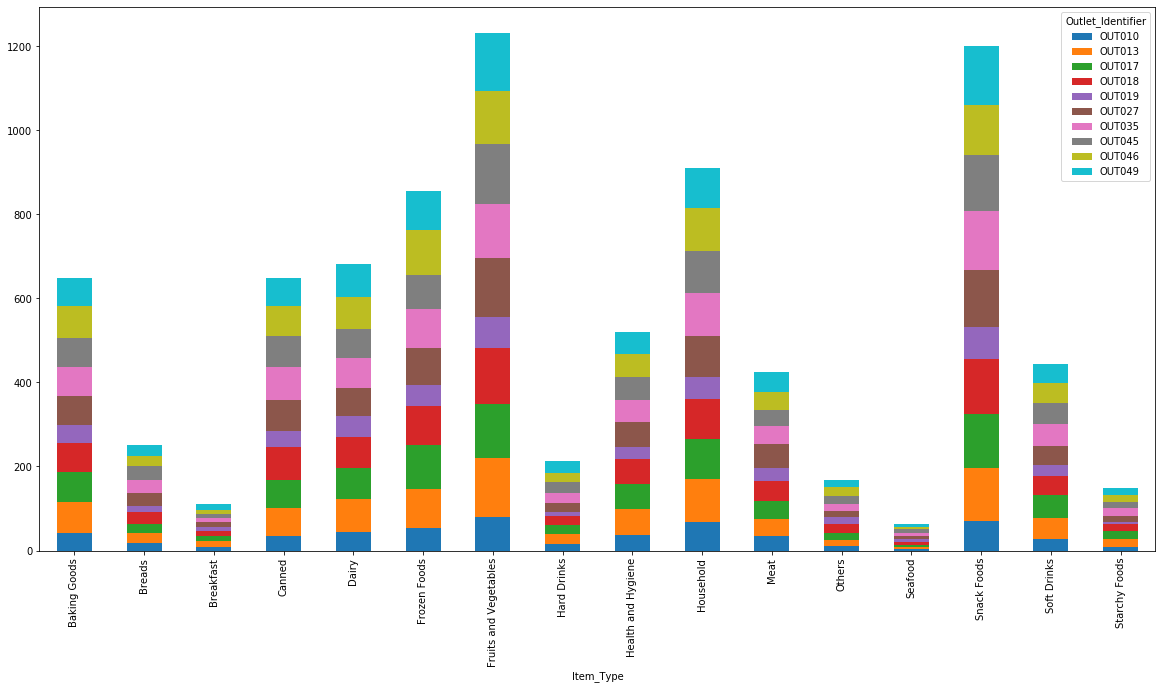

In [23]:
outlettype_itemtype_table.plot(kind="bar", figsize=(20,10),stacked=True)

In [24]:
outlettype_itemtype_table_test = pd.crosstab(index=testdata["Item_Type"],columns=testdata["Outlet_Identifier"])
outlettype_itemtype_table_test

Outlet_Identifier,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
Item_Type,,,,,,,,,,
Baking Goods,30,46,44,51,24,50,50,47,43,53
Breads,13,20,22,18,12,14,16,12,18,20
Breakfast,3,7,8,8,4,9,10,10,10,7
Canned,31,53,49,41,28,48,39,46,48,52
Dairy,28,44,51,51,21,58,53,56,46,46
Frozen Foods,39,63,49,62,47,66,63,73,46,62
Fruits and Vegetables,58,78,88,84,53,80,90,75,94,81
Hard Drinks,9,17,18,17,11,17,18,12,19,10
Health and Hygiene,18,33,31,34,23,35,43,39,39,43


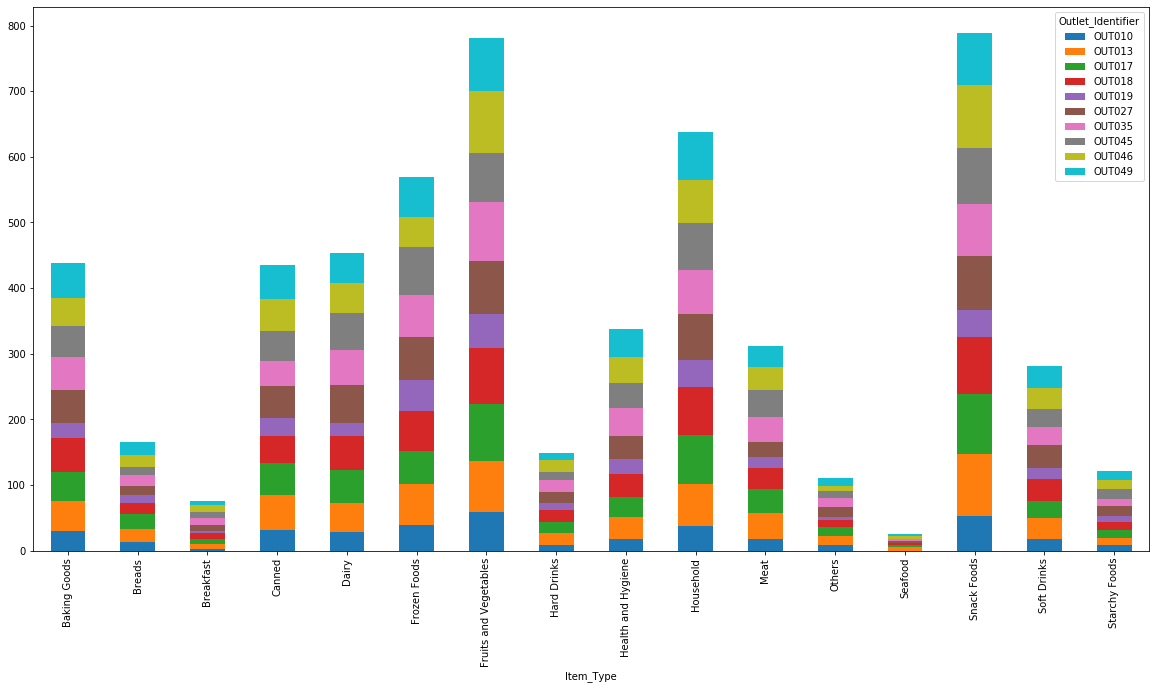

In [25]:
outlettype_itemtype_table_test.plot(kind="bar", figsize=(20,10),stacked=True)

In [26]:

#sns.catplot(x="Outlet_Type", y="Item_Outlet_Sales", hue="Item_Fat_Content", kind="swarm", data=traindata, height=10, aspect=.8)

Text(0.5, 1.0, 'Density and distribution of outlet year for each outlet sales')

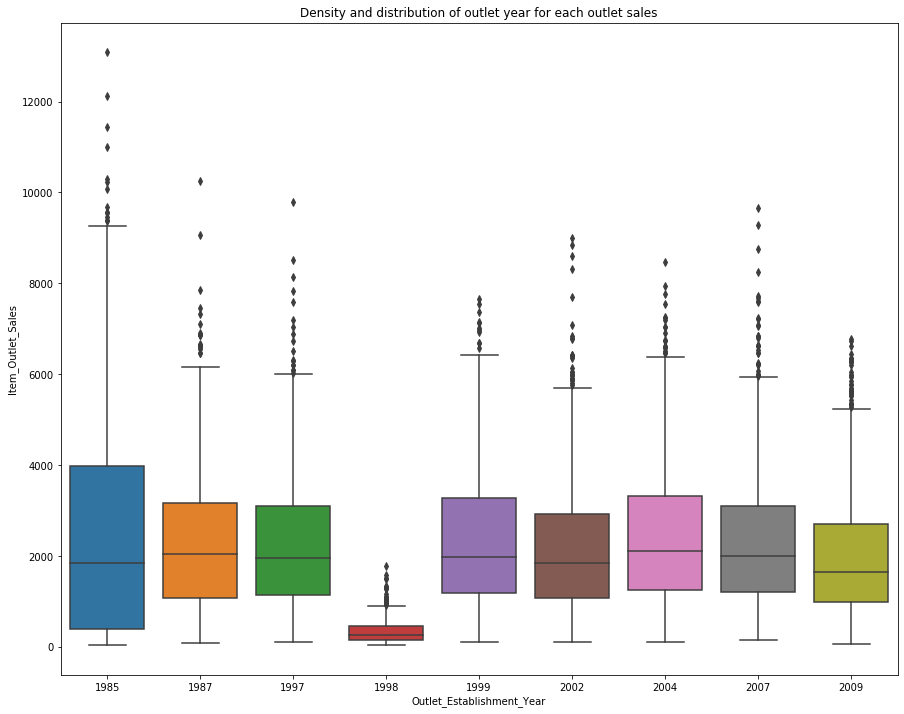

In [27]:
fig,ax=plt.subplots(figsize=(15,12))#size of the plot
plot=sns.boxplot(data=traindata, x='Outlet_Establishment_Year', y='Item_Outlet_Sales')
plot.set_title('Density and distribution of outlet year for each outlet sales')

In [28]:
dropping=['Item_Identifier']
traindata.drop(dropping,axis=1,inplace=True)
testdata.drop(dropping,axis=1,inplace=True)

In [29]:
len(traindata[traindata['Item_Visibility']==0])

526

In [30]:
len(testdata[testdata['Item_Visibility']==0])

353

In [31]:
from missingpy import KNNImputer

In [32]:
imputer = KNNImputer()
imputer.fit(traindata[['Item_Visibility']])

KNNImputer(col_max_missing=0.8, copy=True, metric='masked_euclidean',
           missing_values='NaN', n_neighbors=5, row_max_missing=0.5,
           weights='uniform')

In [33]:
imputer = KNNImputer()
imputer.fit(testdata[['Item_Visibility']])

KNNImputer(col_max_missing=0.8, copy=True, metric='masked_euclidean',
           missing_values='NaN', n_neighbors=5, row_max_missing=0.5,
           weights='uniform')

In [34]:
traindata.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,High,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [35]:
testdata.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,High,Tier 2,Supermarket Type1
2,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,High,Tier 3,Grocery Store
3,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,High,Tier 2,Supermarket Type1
4,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [36]:
traindata.Item_Weight.fillna(method='pad',inplace=True)

In [37]:
testdata.Item_Weight.fillna(method='pad',inplace=True)

In [38]:
for df in traindata, testdata:
       print(df.describe(include='all'))

        Item_Weight Item_Fat_Content  Item_Visibility              Item_Type  \
count   8523.000000             8523      8523.000000                   8523   
unique          NaN                2              NaN                     16   
top             NaN          Low Fat              NaN  Fruits and Vegetables   
freq            NaN             5517              NaN                   1232   
mean      12.849649              NaN         0.066132                    NaN   
std        4.631020              NaN         0.051598                    NaN   
min        4.555000              NaN         0.000000                    NaN   
25%        8.785000              NaN         0.026989                    NaN   
50%       12.600000              NaN         0.053931                    NaN   
75%       16.750000              NaN         0.094585                    NaN   
max       21.350000              NaN         0.328391                    NaN   

           Item_MRP Outlet_Identifier  

In [39]:
pd.DataFrame({"Train data null values":traindata.isnull().sum(),"Test data null values":testdata.isnull().sum()})

,Train data null values,Test data null values
Item_Fat_Content,0,0.0
Item_MRP,0,0.0
Item_Outlet_Sales,0,NaN
Item_Type,0,0.0
Item_Visibility,0,0.0
Item_Weight,0,0.0
Outlet_Establishment_Year,0,0.0
Outlet_Identifier,0,0.0
Outlet_Location_Type,0,0.0
Outlet_Size,0,0.0


In [40]:
traindata.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,High,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [41]:
testdata.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,High,Tier 2,Supermarket Type1
2,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,High,Tier 3,Grocery Store
3,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,High,Tier 2,Supermarket Type1
4,7.315,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [42]:
x=traindata.copy().drop("Item_Outlet_Sales",axis=1)
y=traindata["Item_Outlet_Sales"]

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.30,random_state=1)

In [44]:
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)

(5966, 10)
(2557, 10)
(5966,)


In [45]:
cat_cols = ['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type','Outlet_Establishment_Year']
num_cols = x_train.columns.difference(cat_cols)
num_cols

Index(['Item_MRP', 'Item_Visibility', 'Item_Weight'], dtype='object')

In [46]:
num_data = x_train.loc[:,num_cols]
cat_data = x_train.loc[:,cat_cols]

In [47]:
x_train[cat_cols] = x_train[cat_cols].apply(lambda x: x.astype('category'))
x_train[num_cols] = x_train[num_cols].apply(lambda x: x.astype('float'))
x_train.dtypes

/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


Item_Weight                   float64
Item_Fat_Content             category
Item_Visibility               float64
Item_Type                    category
Item_MRP                      float64
Outlet_Identifier            category
Outlet_Establishment_Year    category
Outlet_Size                  category
Outlet_Location_Type         category
Outlet_Type                  category
dtype: object

In [48]:
x_train = pd.get_dummies(x_train,columns=cat_cols,drop_first=True)

In [49]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5966 entries, 7013 to 235
Data columns (total 43 columns):
Item_Weight                        5966 non-null float64
Item_Visibility                    5966 non-null float64
Item_MRP                           5966 non-null float64
Item_Fat_Content_Regular           5966 non-null uint8
Item_Type_Breads                   5966 non-null uint8
Item_Type_Breakfast                5966 non-null uint8
Item_Type_Canned                   5966 non-null uint8
Item_Type_Dairy                    5966 non-null uint8
Item_Type_Frozen Foods             5966 non-null uint8
Item_Type_Fruits and Vegetables    5966 non-null uint8
Item_Type_Hard Drinks              5966 non-null uint8
Item_Type_Health and Hygiene       5966 non-null uint8
Item_Type_Household                5966 non-null uint8
Item_Type_Meat                     5966 non-null uint8
Item_Type_Others                   5966 non-null uint8
Item_Type_Seafood                  5966 non-null uint8
Item_

In [50]:
num_data = x_val.loc[:,num_cols]
cat_data = x_val.loc[:,cat_cols]

In [51]:
x_val[cat_cols] = x_val[cat_cols].apply(lambda x: x.astype('category'))
x_val[num_cols] = x_val[num_cols].apply(lambda x: x.astype('float'))
x_val.dtypes

Item_Weight                   float64
Item_Fat_Content             category
Item_Visibility               float64
Item_Type                    category
Item_MRP                      float64
Outlet_Identifier            category
Outlet_Establishment_Year    category
Outlet_Size                  category
Outlet_Location_Type         category
Outlet_Type                  category
dtype: object

In [52]:
x_val = pd.get_dummies(x_val,columns=cat_cols,drop_first=True)

In [53]:
x_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2557 entries, 1070 to 7883
Data columns (total 43 columns):
Item_Weight                        2557 non-null float64
Item_Visibility                    2557 non-null float64
Item_MRP                           2557 non-null float64
Item_Fat_Content_Regular           2557 non-null uint8
Item_Type_Breads                   2557 non-null uint8
Item_Type_Breakfast                2557 non-null uint8
Item_Type_Canned                   2557 non-null uint8
Item_Type_Dairy                    2557 non-null uint8
Item_Type_Frozen Foods             2557 non-null uint8
Item_Type_Fruits and Vegetables    2557 non-null uint8
Item_Type_Hard Drinks              2557 non-null uint8
Item_Type_Health and Hygiene       2557 non-null uint8
Item_Type_Household                2557 non-null uint8
Item_Type_Meat                     2557 non-null uint8
Item_Type_Others                   2557 non-null uint8
Item_Type_Seafood                  2557 non-null uint8
Item

In [54]:
num_data = testdata.loc[:,num_cols]
cat_data = testdata.loc[:,cat_cols]

In [55]:
testdata[cat_cols] = testdata[cat_cols].apply(lambda x: x.astype('category'))
testdata[num_cols] = testdata[num_cols].apply(lambda x: x.astype('float'))
testdata.dtypes

Item_Weight                   float64
Item_Fat_Content             category
Item_Visibility               float64
Item_Type                    category
Item_MRP                      float64
Outlet_Identifier            category
Outlet_Establishment_Year    category
Outlet_Size                  category
Outlet_Location_Type         category
Outlet_Type                  category
dtype: object

In [56]:
testdata = pd.get_dummies(testdata,columns=cat_cols,drop_first=True)

In [57]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 43 columns):
Item_Weight                        5681 non-null float64
Item_Visibility                    5681 non-null float64
Item_MRP                           5681 non-null float64
Item_Fat_Content_Regular           5681 non-null uint8
Item_Type_Breads                   5681 non-null uint8
Item_Type_Breakfast                5681 non-null uint8
Item_Type_Canned                   5681 non-null uint8
Item_Type_Dairy                    5681 non-null uint8
Item_Type_Frozen Foods             5681 non-null uint8
Item_Type_Fruits and Vegetables    5681 non-null uint8
Item_Type_Hard Drinks              5681 non-null uint8
Item_Type_Health and Hygiene       5681 non-null uint8
Item_Type_Household                5681 non-null uint8
Item_Type_Meat                     5681 non-null uint8
Item_Type_Others                   5681 non-null uint8
Item_Type_Seafood                  5681 non-null uint8
Item_Ty

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train.iloc[:,:3])
scaler.fit(x_val.iloc[:,:3])
x_train.iloc[:,:3] = scaler.transform(x_train.iloc[:,:3])
x_val.iloc[:,:3] = scaler.transform(x_val.iloc[:,:3])

In [59]:
x_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,...,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Establishment_Year_1987,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1998,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2002,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009
7013,-1.485613,-0.145730,-0.465578,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1355,-0.404865,-0.621025,-0.370022,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5310,-1.018117,-0.157319,-0.413068,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8297,1.160655,-0.957669,-0.532782,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8286,1.668099,-0.503218,0.169812,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [60]:
x_val.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,...,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Establishment_Year_1987,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1998,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2002,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009
1070,0.113376,-0.204329,-1.622829,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6305,-0.102558,0.153965,-0.821027,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
8504,1.624913,1.101561,-0.445072,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5562,-0.102558,0.148281,-0.833645,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1410,0.620821,-1.111916,-1.563512,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [61]:
scaler = StandardScaler()
scaler.fit(testdata.iloc[:,:3])
testdata.iloc[:,:3] = scaler.transform(testdata.iloc[:,:3])

In [62]:
testdata.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,...,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Establishment_Year_1987,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1998,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2002,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009
0,1.733499,-1.134077,-0.536555,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,-0.935630,-0.531850,-0.868937,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0.415014,0.661316,1.629848,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,-1.146802,-0.981416,0.226697,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,-1.146802,1.032540,1.508110,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [63]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

In [122]:
from tpot import TPOTRegressor
tpot_mod=TPOTRegressor(generations=5,population_size=100,verbosity=2)
tpot_mod.fit(x_train,y_train)

Generation 1 - Current best internal CV score: -1167917.5074140183
Generation 2 - Current best internal CV score: -1167917.5074140183
Generation 3 - Current best internal CV score: -1167917.5074140183
Generation 4 - Current best internal CV score: -1167917.5074140183
Generation 5 - Current best internal CV score: -1166904.9210950553

Best pipeline: ExtraTreesRegressor(SelectPercentile(input_matrix, percentile=62), bootstrap=True, max_features=0.9000000000000001, min_samples_leaf=20, min_samples_split=9, n_estimators=100)


TPOTRegressor(config_dict=None, crossover_rate=0.1, cv=5,
              disable_update_check=False, early_stop=None, generations=5,
              max_eval_time_mins=5, max_time_mins=None, memory=None,
              mutation_rate=0.9, n_jobs=1, offspring_size=None,
              periodic_checkpoint_folder=None, population_size=100,
              random_state=None, scoring=None, subsample=1.0, template=None,
              use_dask=False, verbosity=2, warm_start=False)

In [123]:
tpot_pred_train = tpot_mod.predict(x_train)

In [124]:
tpot_pred_val = tpot_mod.predict(x_val)

In [125]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_val, tpot_pred_val)))

1065.0934495233078


In [126]:
print("R2 score =", round(metrics.r2_score(y_train,tpot_pred_train), 2))

R2 score = 0.62


In [127]:
print("R2 score =", round(metrics.r2_score(y_val,tpot_pred_val), 2))

R2 score = 0.61


In [128]:
tpot_pred=tpot_mod.predict(testdata)

In [129]:
final_df=pd.DataFrame()
final_df=testdata1
final_df["Item_Outlet_Sales"]=pd.Series(tpot_pred)

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [130]:
final_df.describe()

,Item_Outlet_Sales
count,5681.000000
mean,2160.268824
std,1327.315341
min,117.638580
25%,1041.929290
50%,2029.640227
75%,3055.827427
max,5867.662494


In [131]:
final_df.to_csv('submission_tpot6.csv',index=False,sep=",")